## 1. Описание задачи

**Цель**: Демонстрация классификации рукописных цифр с использованием SVM на стандартном датасете scikit-learn.

**Алгоритм**: 
- Support Vector Classifier (SVC) с параметром gamma=0.001
- Ядро по умолчанию (RBF)

**Источник данных**: 
- Встроенный датасет `load_digits` (scikit-learn)
- 1797 изображений 8×8 пикселей
- 10 классов (цифры 0-9)
- Значения пикселей: 0-16 (градации серого)

## 2. Препроцессинг данных


# Загрузка данных
digits = datasets.load_digits()

# Преобразование изображений в 1D векторы
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))  # (1797, 64)

# Разделение данных (50% train / 50% test)
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, 
    test_size=0.5, 
    shuffle=False  # Для воспроизводимости
)
Особенности:

Изображения преобразуются из 8×8 в 64-мерные векторы

Тестовая выборка фиксирована (shuffle=False)

## 3. Обучение модели

# Создание и обучение SVM классификатора
clf = svm.SVC(gamma=0.001)  # gamma контролирует влияние каждого примера
clf.fit(X_train, y_train)

# Предсказание на тестовых данных
predicted = clf.predict(X_test)


## 4. Визуализация
Примеры изображений из обучающей выборки

_, axes = plt.subplots(1, 4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images[:4], digits.target[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {label}")
    
Примеры предсказаний

_, axes = plt.subplots(1, 4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test[:4], predicted[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(8, 8), cmap=plt.cm.gray_r)
    ax.set_title(f"Prediction: {prediction}")
    
Матрица ошибок

disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()



Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [

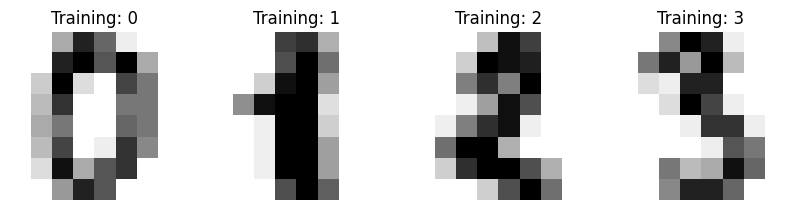

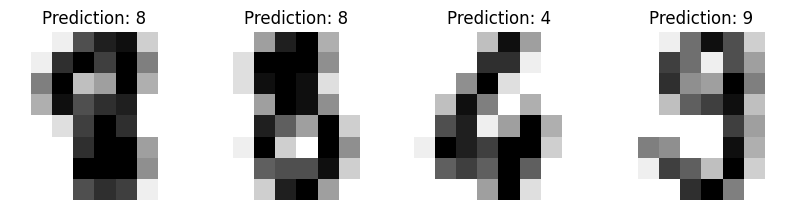

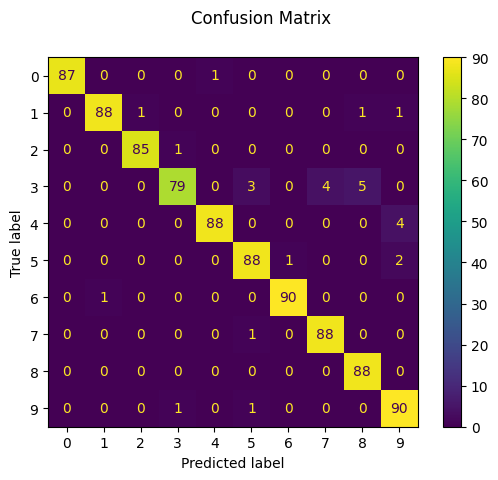

Classification report rebuilt from confusion matrix:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [7]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split


digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)




    # flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)





_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")



print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)



disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()





# The ground truth and predicted lists
y_true = []
y_pred = []
cm = disp.confusion_matrix

# For each cell in the confusion matrix, add the corresponding ground truths
# and predictions to the lists
for gt in range(len(cm)):
    for pred in range(len(cm)):
        y_true += [gt] * cm[gt][pred]
        y_pred += [pred] * cm[gt][pred]

print(
    "Classification report rebuilt from confusion matrix:\n"
    f"{metrics.classification_report(y_true, y_pred)}\n"
)


## 5. Результаты и интерпретация
Основные метрики (из classification_report): 
       precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899

Ключевые наблюдения:

Общая точность: 97%

Наилучшие результаты: цифры 0, 2, 6 (F1 > 0.99)

Наибольшие трудности: цифра 3 (recall=0.87)

Основные ошибки:

3 ↔ 8 (11 случаев)

5 ↔ 8 (5 случаев)

4 ↔ 9 (4 случая)